# Caelan Osman
## Math 437 Sec. 2
## Sep. 30, 2021

In [23]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['figure.figsize'] = [8, 5]

# Problem 1

The solve_ivp solver requires a callable function representing the right hand side of the IVP. Define the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. Use $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as your growth parameters.

In [24]:
def predator_prey(t, y):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    #set growth parameters
    α, β, δ, γ = 1.0, 1/2., 3/4., 1/4.
    
    #return ode function
    return y[0]*(α - β*y[1]), y[1]*(-δ + γ * y[0])


# Problem 2

Use solve_ivp to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. Display the resulting rabbit and wolf populations over time (stored as columns in the output of solve_ivp) on the same plot.

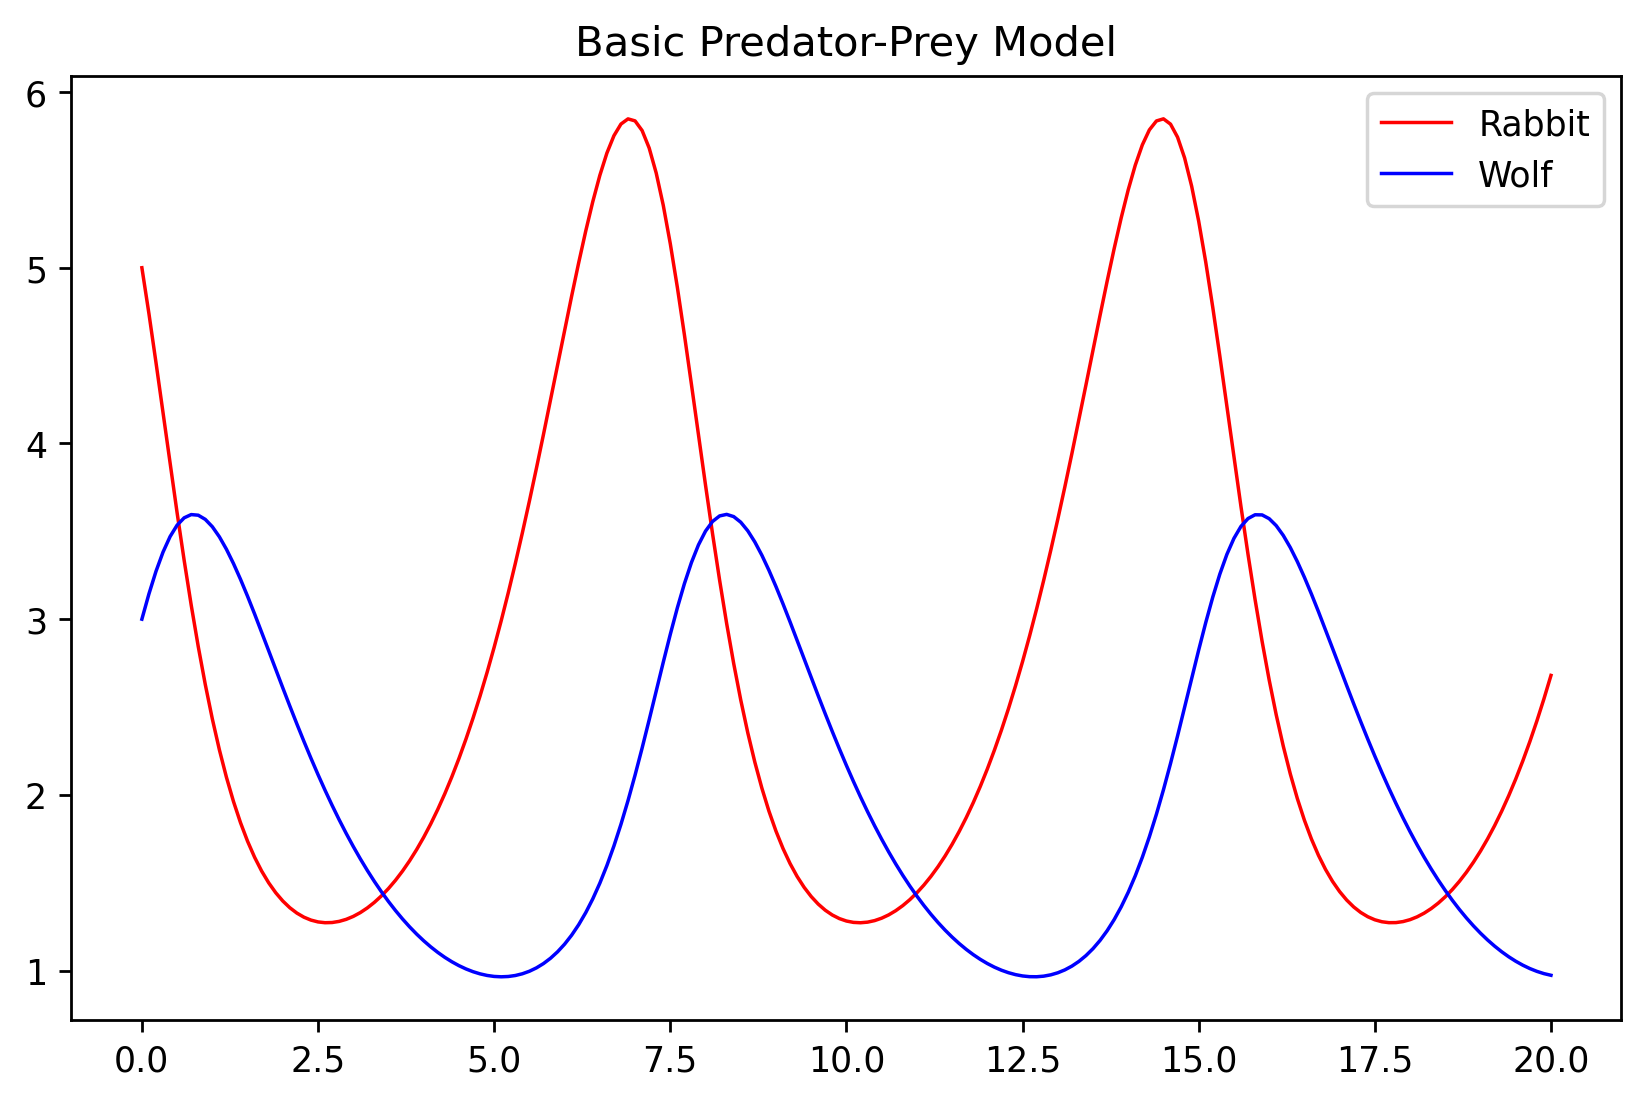

In [25]:
#time span and initial conditions
t_span = (0, 20)
y0 = np.array([5, 3])

#solve ivp
sol = solve_ivp(predator_prey, t_span, y0, max_step=0.1)

#plot the solutions
fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(111)
ax.plot(sol.t, sol.y[0], color='r', lw=1, label='Rabbit')
ax.plot(sol.t, sol.y[1], color='b', lw=1, label='Wolf')
ax.legend(loc='best')
ax.set_title(r'Basic Predator-Prey Model')
plt.show()

# Problem 3

Similar to problem 1, define the function Lotka_Volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using solve_ivp, solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. Plot these three solutions on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

Since your solutions are being plotted with the phase portrait, plot the two populations against eachother (instead of both individually against time).

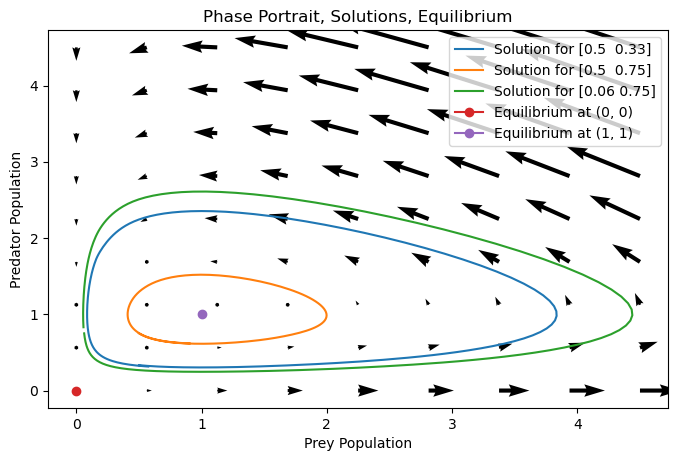

In [26]:
def Lotka_Volterra(t, y):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    #define undimensionalized growth factor
    η = 1/3.
    
    return y[0]*(1 - y[1]), η*y[1]*(y[0] - 1)

# Provided code for plotting phase portrait.
fig = plt.figure()
fig.set_dpi(100)
ax = fig.add_subplot(111)
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra( 0, (Y1, Y2))
Q = ax.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

#set up time span and initial conditions
t_span = (0, 13)
t_eval = np.linspace(0, 13, 200)
y0_1 = np.array([1/2., 1/3.])
y0_2 = np.array([1/2., 3/4.])
y0_3 = np.array([1/16., 3/4.])

#get 3 different solutions
sol1 = solve_ivp(Lotka_Volterra, t_span, y0_1, t_eval = t_eval)
sol2 = solve_ivp(Lotka_Volterra, t_span, y0_2, t_eval = t_eval)
sol3 = solve_ivp(Lotka_Volterra, t_span, y0_3, t_eval = t_eval)

#plot the three different solutions on the phase field with the equilibrium solutions
plt.plot(sol1.y[0], sol1.y[1], label=r'Solution for ' + str(np.round(y0_1, decimals=2)))
plt.plot(sol2.y[0], sol2.y[1], label=r'Solution for ' + str(np.round(y0_2, decimals=2)))
plt.plot(sol3.y[0], sol3.y[1], label=r'Solution for ' + str(np.round(y0_3, decimals=2)))
plt.plot(0, 0, marker='o', markersize=6, label=r'Equilibrium at ' + repr((0, 0)))
plt.plot(1, 1, marker='o', markersize=6, label=r'Equilibrium at ' + repr((1, 1)))
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend(loc='best')
plt.title(r'Phase Portrait, Solutions, Equilibrium')
plt.show()

# Problem 4

Define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

Use solve_ivp to compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5). Do this for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Create a phase portrait for the logistic equations using both sets of parameter values. Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

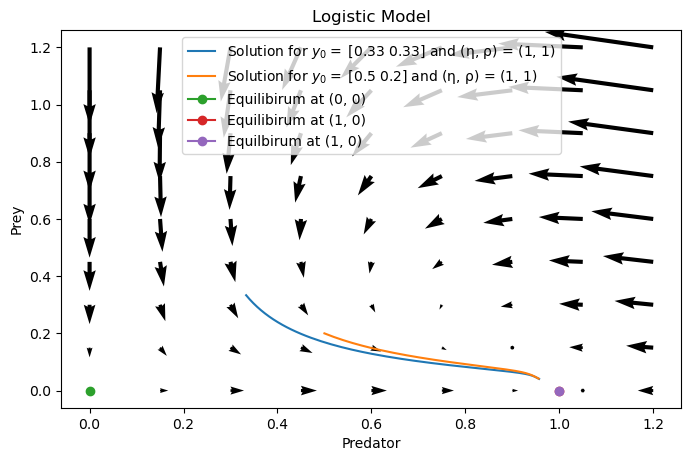

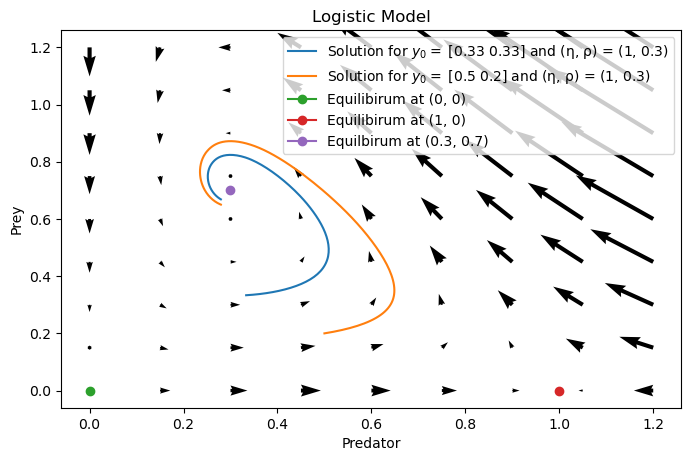

In [27]:
def Logistic_Model(t, y, η, ρ):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    #dimensional growth parameters
    return y[0]*(1 - y[0] - y[1]), η*y[1]*(y[0] - ρ)

#set up eta and rho values and intial condtions
η_vals = (1, 1)
ρ_vals = (1, 0.3)
initial_conditions = [(1/3., 1/3.,), (1/2., 1/5.)]
equilibrium_solutions = [(0, 0), (1, 0)]
t_span = (0, 13)
t_eval = np.linspace(t_span[0], t_span[-1], 200)

for η, ρ in zip(η_vals, ρ_vals):
    #set up figure and subplot
    fig = plt.figure()
    fig.set_dpi(100)
    ax = fig.add_subplot(111)
    #plot the phase plot for the given η and ρ values. 
    Y1, Y2 = np.meshgrid(np.linspace(0,1.2,25), np.linspace(0,1.2,25))
    dU, dV = Logistic_Model( 0, (Y1, Y2), η, ρ)
    Q = ax.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])
    for y0 in initial_conditions:
        sol = solve_ivp(Logistic_Model, t_span, y0, t_eval = t_eval, args=(η, ρ))
        ax.plot(sol.y[0], sol.y[1], label=r'Solution for $y_0 = $ ' + str(np.round(y0, decimals=2)) + ' and (η, ρ) = ' + repr((η, ρ)))
    ax.plot(0, 0, marker='o', markersize=6, label=r'Equilibirum at ' + repr((0, 0)))
    ax.plot(1, 0, marker='o', markersize=6, label=r'Equilibirum at ' + repr((1, 0)))
    ax.plot(ρ, 1-ρ, marker='o', markersize=6, label=r'Equilbirum at ' + repr((ρ, 1-ρ)))
    
    ax.set_xlabel('Predator')
    ax.set_ylabel('Prey')
    ax.set_title(r'Logistic Model')
    ax.legend(loc='best')
    plt.show()



# Problem 5

Write the functions forbes() which takes as input F(t) and returns Forbe’s equation. Also write the function energy_balance() which takes as input F (t), L(t), PAL, and EI and returns the energy balance as given in the lab. Use $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

In [28]:
#set constants
ρ_F, ρ_L, γ_F, γ_L, η_F, η_L, K, β_AT = 9400, 1800, 3.2, 22, 180, 230, 0, 0.14


def forbes(F):
    C = 10.4 * ρ_L / ρ_F
    
    return C / (C+ F)

def energy_balance(F, L, PAL, EI):
    
    numerator = (-β_AT + 1/PAL) *EI - K - γ_F * F - γ_L * L
    denominator = (η_F/ρ_F)*(1 - forbes(F)) + (η_L/ρ_L)*forbes(F) + (1/PAL)
    
    return numerator/denominator

def weight_odesystem(t, y):
    
    
    return (1 - forbes(y[0]))*energy_balance(y[0], y[1], PAL, EI)/ ρ_F, forbes(y[0])*energy_balance(y[0], y[1], PAL, EI) / ρ_L
    

# Problem 6

Consider the initial value problem corresponing to (1.4).

$\frac{dF}{dt} = \frac{(1−p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The provided function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. Use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW − F_0$.

Suppose a 38 year old female, standing 5’8” and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


Use the original intake and phyical activity levels to compute K for this system. Then use solve_ivp to solve the IVP. Graph the solution curve for this single-stage weightloss intervention over a period of 5 years. 


Note the provided code requires quantities in metric units (kilograms, meters, days).

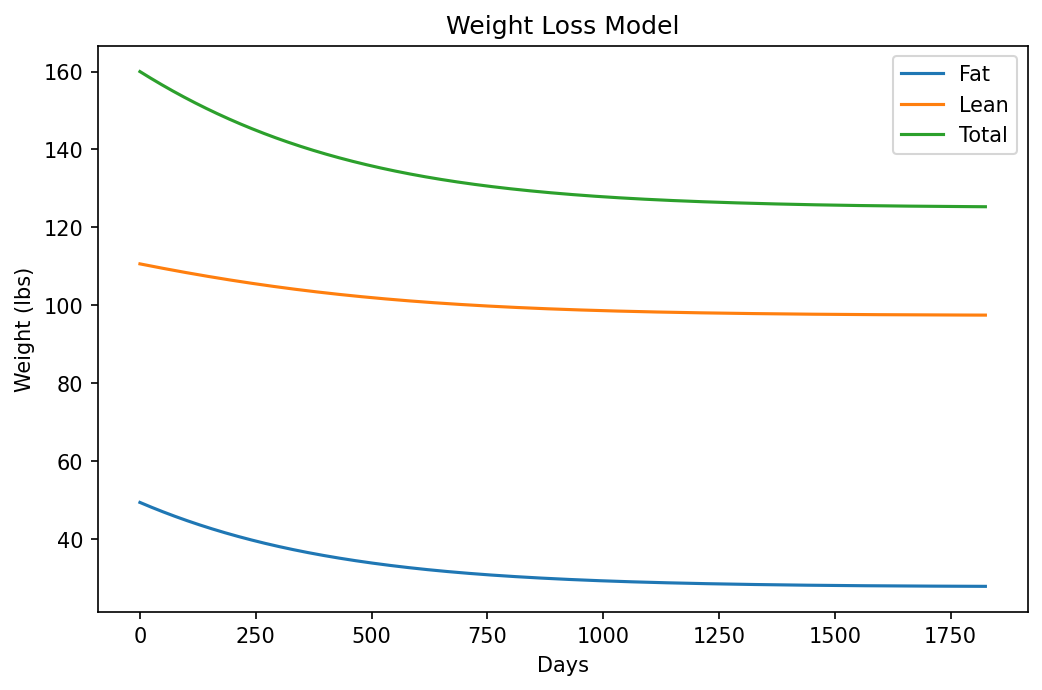

In [29]:
# Provided function.
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100
    

#BW, age, Heigh, Phiscal activity constant, energy intake constant
BW = 160/2.204
age = 38
H = 1.72719998
PAL0 = 1.4 
EI0 = 2143


#compute initial conditions and K
F0 = fat_mass(BW, age, H, 'female')
L0 = BW - F0
K = (1/PAL0 - β_AT)*EI0 - γ_F*F0 - γ_L * L0

#set current physical activity and energy intake
PAL = 1.5
EI = 2025

#set up and solve ode
t_span = (0, 5*365)
t_evals = np.linspace(t_span[0], t_span[-1], 5*365+1)
y0 = [F0, L0]
sol = solve_ivp(weight_odesystem, t_span, y0, t_eval = t_evals)

#plot figure (convert back to pounds)
fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111)
ax.plot(t_evals, sol.y[0]*2.204, label='Fat')
ax.plot(t_evals, sol.y[1]*2.204, label='Lean')
ax.plot(t_evals, (sol.y[0]+sol.y[1])*2.204, label='Total')
ax.legend(loc='best')
ax.set_xlabel('Days')
ax.set_ylabel('Weight (lbs)')
ax.set_title('Weight Loss Model')
plt.plot()
plt.show()

# Problem 7

Modify the preceding problem to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

You will need to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same. Find and graph the solution curve over the 32 week period.

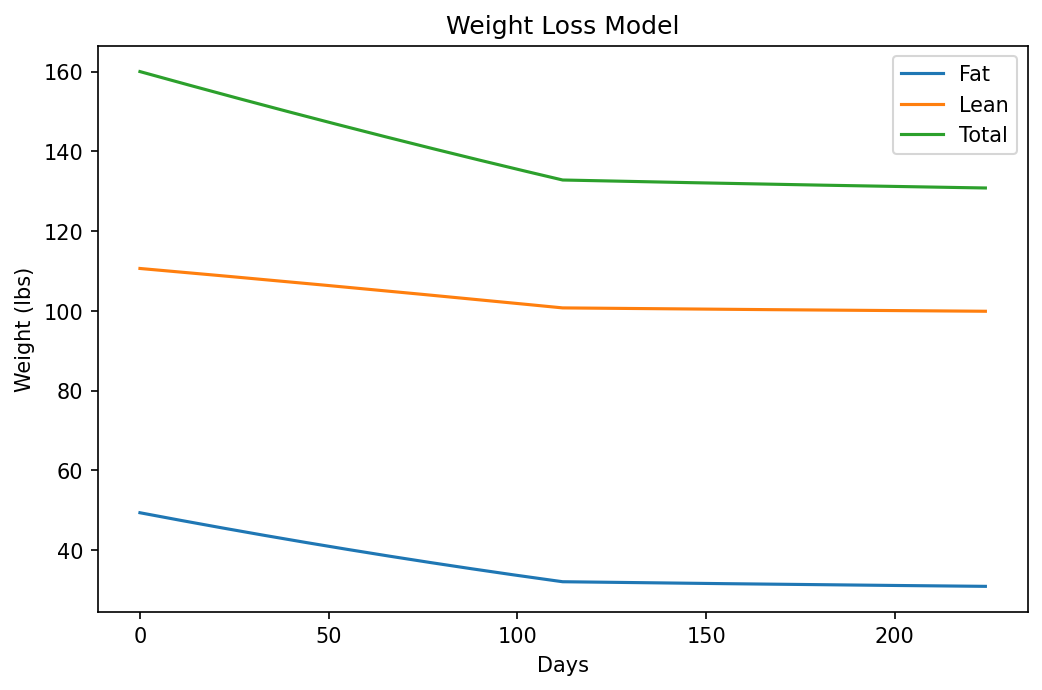

In [30]:
#BW, age, Heigh, Phiscal activity constant, energy intake constant
BW = 160/2.204
age = 38
H = 1.72719998
PAL0 = 1.4 
EI0 = 2143


#compute initial conditions and K
F0 = fat_mass(BW, age, H, 'female')
L0 = BW - F0
K = (1/PAL0 - β_AT)*EI0 - γ_F*F0 - γ_L * L0

#set current physical activity and energy intake (stage 1)
PAL = 1.7
EI = 1600

#set up and solve ode for the first stage
t_span_1 = (0, 16*7)
t_evals1 = np.linspace(t_span_1[0], t_span_1[-1], 16*7+1)
y0 = [F0, L0]
sol1 = solve_ivp(weight_odesystem, t_span_1, y0, t_eval = t_evals1)

#compute the second set of initial conditions
#get new body weight
F0, L0 = sol1.y[0][-1], sol1.y[1][-1]
PAL = 1.5
EI = 2025

#set up and solve ode for the second stage
t_span_2 = (16*7, 32*7)
t_evals2 = np.linspace(t_span_2[0], t_span_2[-1], 16*7+1)
y0 = [F0, L0]
sol2 = solve_ivp(weight_odesystem, t_span_2, y0, t_eval = t_evals2)

#plot figure (convert back to pounds)
time = np.concatenate((t_evals1, t_evals2))
fat = np.concatenate((sol1.y[0], sol2.y[0]))*2.204
lean = np.concatenate((sol1.y[1], sol2.y[1]))*2.204
fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111)
ax.plot(time, fat, label='Fat')
ax.plot(time, lean, label='Lean')
ax.plot(time, fat+lean, label='Total')
ax.legend(loc='best')
ax.set_xlabel('Days')
ax.set_ylabel('Weight (lbs)')
ax.set_title('Weight Loss Model')
plt.plot()
plt.show()